###### ECE 283: Homework 3
###### Topics: Unsupervised Learning, part 1 (Gaussian mixtures and EM algorithm; K-means and soft K-means)
###### Due: Friday May 11

- Neural networks; Tensorflow
- 2D synthetic gaussian mixture data for binary classification


### Report 
##### With reference to the code and plots in the detailed report & code below

----------------------------------------

##### Generate the 2D sample data
Generated data in In[61] through In[65]

##### 1. KMeans : Observations are mentioned right after the plot In[7] along with the probability values for each K when compared to the ground truth

With values of K = 2, 3, 4, 5. For each K. 

##### 2. EM : log likelihood plot is described below in  section In[8] with K=2,3,4,5

##### 3. Comments on the variation of mean with covariance

##### 4. Generated Multidim data  section In[9]

##### 5. Gaussian Mix with Component 1,2,3 generated in section In[10]

##### 6. The Kmeans on the data can be seen in section In[11] and In[12] below
All the values can be seen in the log for each K=2,3,4,5

##### 7. Geometric insight 
Yes, The values of means calculated after computing the d-dimensional matrix are quite relatable to the "u" vector generated in starting. And the relation is as follows. Component 1 = u1 + Z1u2 + Z2u3 + N and the d-dimensional mean calculated after is , for all the values that have -1 in the position when taking the final values of component 1, the corresponding values in mean matrix are nearer to -1 or less then 0, similary for all the values that summed to 1 in the component 1, the corresponding value in mean matrix is greater then 0. Similary for all the three components created so far. Hence it can be deduced from the values of mean that, the initial vector "u" used in creation of genertion of data or each component actually influences the values of corresponding means of the final mean matrix. 

##### 8. EM Algorithm in section In[13]
Eigen vectors and the covariance directly relate to the parameters Xm1, Xm2, Xm3 of the various gaussian mixture components.  


# Code Section

In [1]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import numpy as np
from math import *
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import norm
from IPython.display import Image, display, Math, Latex

# Params
n_inpoints = 200

C:\Users\Karma\Anaconda3\envs\tflo\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def generateClass0(): 
    theta0 = 0
    lmb01 = 2
    lmb02 = 1
    m0 = (0,  0)
    # computing u * u.T and later multiplying with lambda
    cov01 = [[(cos(theta0))**2,    cos(theta0)*sin(theta0)],
             [(sin(theta0))*cos(theta0), (sin(theta0))**2]]
    cov02 = [[(sin(theta0))**2,    -(cos(theta0)*sin(theta0))],
             [-(cos(theta0)*sin(theta0)), (cos(theta0))**2]]
    cov0 = lmb01*np.matrix(cov01) + lmb02*np.matrix(cov02)
    print('Mean: ',m0,' ','\nCov :',cov0)
    cov0_det = np.linalg.det(cov0)
    x0, y0 = np.random.multivariate_normal(m0, cov0, int(n_inpoints)).T
    return x0,y0

x0, y0 = generateClass0()

Mean:  (0, 0)   
Cov : [[2. 0.]
 [0. 1.]]


In [3]:
# Mixture A
def generateClass1a():
    theta1a = -3*pi/4
    lmb1a1 = 2
    lmb1a2 = 1/4
    m1a = (-2, 1)
    cov1a = [[(cos(theta1a))**2,    cos(theta1a)*sin(theta1a)],
             [(sin(theta1a))*cos(theta1a), (sin(theta1a))**2]]
    cov2a = [[(sin(theta1a))**2,    -(cos(theta1a)*sin(theta1a))],
             [-(cos(theta1a)*sin(theta1a)), (cos(theta1a))**2]]
    cov1a = lmb1a1*np.matrix(cov1a) + lmb1a2*np.matrix(cov2a)
    cov1a_det = np.linalg.det(cov1a)
    x1a, y1a = np.random.multivariate_normal(m1a, cov1a, int(n_inpoints)).T
    print('Mean: ',m1a,' ','\nCov :',cov1a)
    return x1a,y1a

# Mixture B
def generateClass1b():
    theta1b = pi/4
    lmb1b1 = 3
    lmb1b2 = 1
    m1b = (3, 2)
    cov1b = [[(cos(theta1b))**2,    cos(theta1b)*sin(theta1b)],
             [(sin(theta1b))*cos(theta1b), (sin(theta1b))**2]]
    cov2b = [[(sin(theta1b))**2,    -(cos(theta1b)*sin(theta1b))],
             [-(cos(theta1b)*sin(theta1b)), (cos(theta1b))**2]]
    cov1b = lmb1b1*np.matrix(cov1b) + lmb1b2*np.matrix(cov2b)
    cov1b_det = np.linalg.det(cov1b)
    x1b, y1b = np.random.multivariate_normal(m1b, cov1b, int(n_inpoints)).T
    print('Mean: ',m1b,' ','\nCov :',cov1b)
    return x1b,y1b

x1a, y1a = generateClass1a()
x1b, y1b = generateClass1b()

Mean:  (-2, 1)   
Cov : [[1.125 0.875]
 [0.875 1.125]]
Mean:  (3, 2)   
Cov : [[2. 1.]
 [1. 2.]]


Coefficients count for 3 GMM components:  [100, 33, 67]
Component identifiers for GMM mixture:  (200, 1)


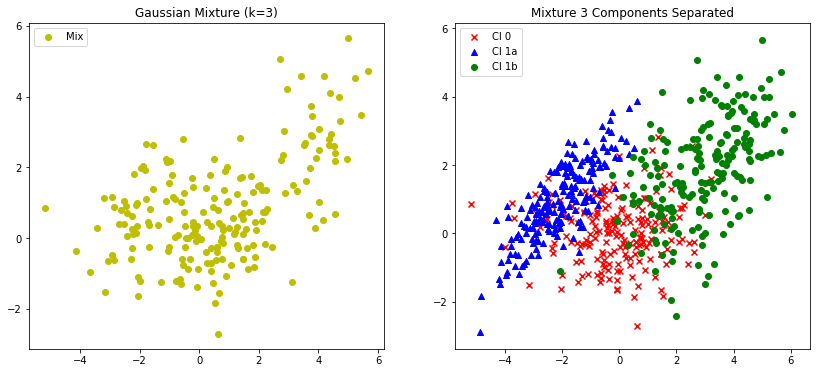

In [4]:
# Mixture Density of 3 component Gaussian
# [Class0 * (1/2) + Class1A * (1/6) + Class1B * (1/3)] 
cnt_m1 = [int(ceil(n_inpoints*(1/2))),int(floor(n_inpoints*(1/6))),int(ceil(n_inpoints*(1/3)))] 
print('Coefficients count for 3 GMM components: ',cnt_m1)

# Randomly pick mixture components 
idx_m1 = np.argsort(np.random.random(n_inpoints))[:cnt_m1[0]]
idx_m2 = np.argsort(np.random.random(n_inpoints))[:cnt_m1[1]]
idx_m3 = np.argsort(np.random.random(n_inpoints))[:cnt_m1[2]]

# Combine the arrays 

y = np.concatenate((np.array(y0[idx_m1]), np.array(y1a[idx_m2]), np.array(y1b[idx_m3])), axis = 0)
x = np.concatenate((np.array(x0[idx_m1]), np.array(x1a[idx_m2]), np.array(x1b[idx_m3])), axis = 0)
z = np.array([1,0,0]*int(cnt_m1[0]) + [0,1,0]*int(cnt_m1[1])+ [0,0,1]*int(cnt_m1[2])).reshape(n_inpoints,3)
z_val = np.array([0]*int(cnt_m1[0]) + [1]*int(cnt_m1[1])+ [2]*int(cnt_m1[2])).reshape(n_inpoints,1)
print('Component identifiers for GMM mixture: ', z_val.shape)

# Subplots 
f, (ax1, ax2) = plt.subplots(1,2,figsize=(14,6))
ax1.scatter(x, y, color = 'y',marker='o', label = 'Mix')
ax1.set_title('Gaussian Mixture (k=3)')
ax1.legend()
ax2.scatter(x0, y0, color = 'r',marker='x', label = 'Cl 0')
ax2.scatter(x1a, y1a, color = 'b',marker='^', label = 'Cl 1a')
ax2.scatter(x1b, y1b, color = 'g',marker='o', label = 'Cl 1b')
ax2.set_title('Mixture 3 Components Separated')
ax2.legend()
f.subplots_adjust()

Training Data, X(x1,x2) Shape: (200, 2) , Y Shape (200, 1)


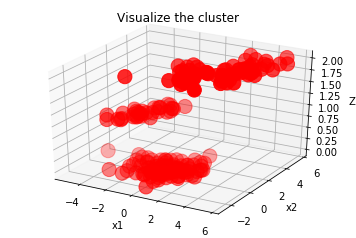

In [5]:
# ----------------------------------------
# Set up the [Xi, Yi] training data vector
# ----------------------------------------
X = np.vstack((x, y)).T
Z_val = z_val
print("Training Data, X(x1,x2) Shape:",X.shape, ', Y Shape', z_val.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Z_val, s=int(z_val.shape[0]), c='r', marker='o')
ax.set_title('Visualize the cluster')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Z')
plt.show()

## 1. KMEANS

##### With values of K = 2, 3, 4, 5. For each K, start with several different random initializations, 
##### and choose the run that leads to the smallest mean squared error. 


[[ 3.45129465  2.30738825]
 [-0.46744735  0.27677531]]


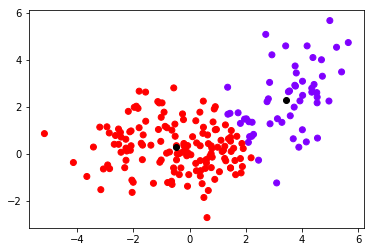

In [6]:
from sklearn.cluster import KMeans  
kmeans = KMeans(n_clusters=2)  
kmeans.fit(X)  
print(kmeans.cluster_centers_) 
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')  

K= 2
(K= 1 )Prob:( 90 / 141 )= 0.6382978723404256
(K= 2 )Prob:( 0 / 59 )= 0.0
K= 3
(K= 1 )Prob:( 27 / 61 )= 0.4426229508196721
(K= 2 )Prob:( 0 / 41 )= 0.0
(K= 3 )Prob:( 26 / 98 )= 0.2653061224489796
K= 4
(K= 1 )Prob:( 0 / 40 )= 0.0
(K= 2 )Prob:( 13 / 28 )= 0.4642857142857143
(K= 3 )Prob:( 22 / 92 )= 0.2391304347826087
(K= 4 )Prob:( 0 / 40 )= 0.0
K= 5
(K= 1 )Prob:( 48 / 68 )= 0.7058823529411765
(K= 2 )Prob:( 24 / 34 )= 0.7058823529411765
(K= 3 )Prob:( 6 / 30 )= 0.2
(K= 4 )Prob:( 0 / 40 )= 0.0
(K= 5 )Prob:( 0 / 28 )= 0.0


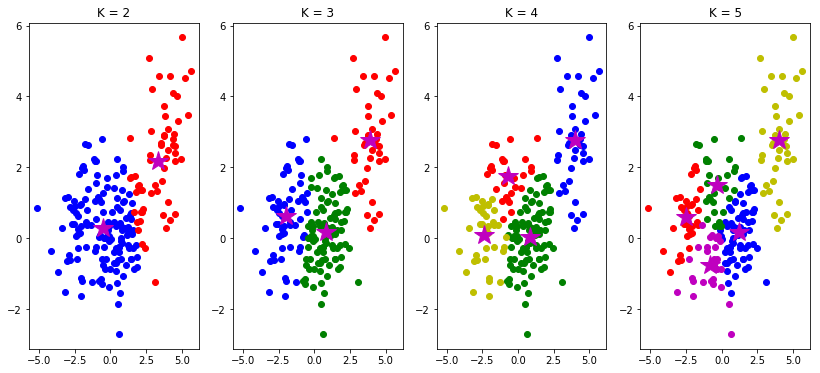

In [7]:
# KMeans Algorithms Implementation using euclidean distance 
def kMeans(X, K, maxIters = 10):
    # Centroid m1, m2 ... mk
    centroids = X[np.random.choice(np.arange(len(X)), K), :]
    #print(centroids)
    for i in range(maxIters):
        # Cluster Assignment step
        C = np.array([np.argmin([np.dot(x_i-m_k, x_i-m_k) for m_k in centroids]) for x_i in X])
        # Move centroids step
        centroids = [X[C == k].mean(axis = 0) for k in range(K)]
    return np.array(centroids) , C


# Calculate the probability wrt the ground truth
def cprob(C, K): 
    ground = (Z_val.T)[0]
    print('K=',K)
    for k in range(K):
        found_ids = np.where(C==k)
        matched_ground = np.count_nonzero(C[found_ids]==ground[found_ids])
        if(len(found_ids[0])>0):
            print('(K=',k+1,')Prob:(',matched_ground,'/',len(found_ids[0]),')=', (matched_ground/len(found_ids[0])))
        else:
            print('(K=',k+1,')Prob:(',matched_ground,'/',len(found_ids[0]),')=', 0)
        
   
    
# Provide a value of k = (1,...K) and plot the centroids
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(14,6))
centroids, C = kMeans(X, K = 2)
ax1.plot(X[C == 0, 0], X[C == 0, 1], 'ob',
             X[C == 1, 0], X[C == 1, 1], 'or')
ax1.plot(centroids[:,0],centroids[:,1],'*m',markersize=20)
ax1.set_title('K = 2')
cprob(C,2)

centroids, C = kMeans(X, K = 3)
ax2.plot(X[C == 0, 0], X[C == 0, 1], 'ob',
             X[C == 1, 0], X[C == 1, 1], 'or',
             X[C == 2, 0], X[C == 2, 1], 'og')
ax2.plot(centroids[:,0],centroids[:,1],'*m',markersize=20)
ax2.set_title('K = 3')
cprob(C,3)

centroids, C = kMeans(X, K = 4)
ax3.plot(X[C == 0, 0], X[C == 0, 1], 'ob',
             X[C == 1, 0], X[C == 1, 1], 'or',
             X[C == 2, 0], X[C == 2, 1], 'og',
             X[C == 3, 0], X[C == 3, 1], 'oy')
ax3.plot(centroids[:,0],centroids[:,1],'*m',markersize=20)
ax3.set_title('K = 4')
cprob(C,4)
centroids, C = kMeans(X, K = 5)
ax4.plot(X[C == 0, 0], X[C == 0, 1], 'ob',
             X[C == 1, 0], X[C == 1, 1], 'or',
             X[C == 2, 0], X[C == 2, 1], 'og',
             X[C == 3, 0], X[C == 3, 1], 'oy',
             X[C == 4, 0], X[C == 4, 1], 'om')
ax4.plot(centroids[:,0],centroids[:,1],'*m',markersize=20)
ax4.set_title('K = 5')
cprob(C,5)

Observations
##### As we can see from the plot of mean represented by the "Star" in magenta color. The mean and covariance are best converging when the value of K=3 , on increasing the value of K beyond 3 , the mean and covarianec then also converges to the same values , and as we can see from the plot, the values of 2 means converges to the same point, While intializing the values of mean with random variables, we found out that even if we take the values of mean too far away and too different , for example in case of K=5, the values on m_hat[1,:] and m_hat[3,:], these are too far away, but once the convergence starts , then the values of both converges to the same point. As shown in the matrix of of mean values and as you can see from the plot. All the values of mean converges to same point if both are coming from the same direction towards the cluster. OR i simple terms of both the assumed intial values of means are in same direction of the cluster and approaching from the same direction.

## 2. KMEANS - EM Algorithm

#### E-STEP
We will evaluate the expectation of the below equation for the current estimate of the parameter,

1. $ log p(x_{i}, z_{i} | \theta) = \sum_{k=1}^{K} z_{i} [k] (log N (x_{i} | m_{k}, C_{k}) + log \pi_{k}) $
2. $ E[log p(x_{i}, z_{i} | \theta) | \theta^l ] = \sum_{k=1}^{K} p(k|x_{i}) (log N (x_{i} | m_{k}, C_{k}) + log \pi_{k}) $
Note that $ \theta = \{ pi_{k}, m_{k}, C_{k} \}_{k=1}^{K} $ in the above is to be optimized over to get the next estimate $ \theta^{l+1} $ in the M-step, and $ p(k|x_{i}) $ are numerical values that we computed using the current estimate
$ \theta^{l} $  in the E-step

#### M-STEP
We now use these assignment probabilities as weights as to how much each data point counts towards estimating the parameters for a given cluster, and update the parameters for each component k as follows,

1. $ m_{k} = \frac{ \sum_{i=1}^{N} p(k|x_{i})x_{i}}{\sum_{i=1}^{N} p(k|x_{i})} $
2. $ C_{k} = \frac{ \sum_{i=1}^{N} p(k|x_{i})(x_{i} - m_{k})(x_{i} - m_{k})^{T}}{\sum_{i=1}^{N} p(k|x_{i})} $
3. $ pi_{k} = \frac{ \sum_{i=1}^{N} p(k|x_{i})}{N} $





---------- K= 2 Parameters estimate ----------
LogL : [-2282.820379107024, -2.7755575615628914e-15, -6.661338147750939e-16]
Mu   : [[0.1562487  0.52021437]
 [4.35130486 2.79023415]]
Si   : [array([[3.91614648, 0.63001193],
       [0.63001193, 1.367434  ]]), array([[1., 0.],
       [0., 1.]])]
W    : [0.869980853527839, 0.5]

---------- K= 3 Parameters estimate ----------
LogL : [-1079.6018514760383, -97.52051002898406, -2.220446049250313e-15, 1.1102230246251536e-16]
Mu   : [[-1.18513646  0.1693727 ]
 [ 0.01817047  0.25748304]
 [ 0.48860611  2.24264206]]
Si   : [array([[ 2.26748561, -0.21315027],
       [-0.21315027,  1.02642225]]), array([[ 1.98435422, -0.23899901],
       [-0.23899901,  1.01622004]]), array([[1., 0.],
       [0., 1.]])]
W    : [0.3231822032914043, 0.301598088119588, 0.3333333333333333]

---------- K= 4 Parameters estimate ----------
LogL : [-1196.0684971479864, -176.2557405872803, -2.6645352591003757e-15, -1.1102230246251568e-16]
Mu   : [[-1.90310472  0.29831427]
 [ 

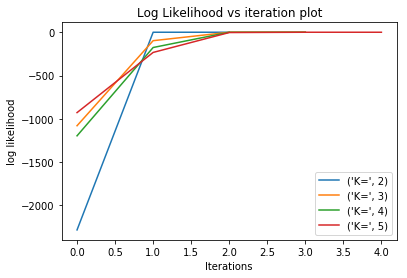

In [8]:

def fit_EM(X, max_iters = 1000, k=2, eps=0.000001):
    # n = number of data-points, d = dimension of data points        
    n, d = X.shape
    # randomly choose the starting centroids/means as 3 of the points from datasets        
    mu = X[np.random.choice(n, k, False), :]
    # initialize the covariance matrices for each gaussians
    Sigma= [np.eye(d)] * k
    # initialize the probabilities/weights for each gaussians
    w = [1./k] * k
    # responsibility matrix is initialized to all zeros
    # we have responsibility for each of n points for eack of k gaussians
    R = np.zeros((n, k))
    
    ### log_likelihoods
    log_likelihoods = []
    P = lambda mu, s: (np.linalg.det(s)** -.5)*((2*np.pi)**(-X.shape[1]/2.)) \
            * np.exp(-.5 * np.einsum('ij, ij -> i',X - mu, \
                np.dot(np.linalg.inv(s) , (X - mu).T).T ) ) 
    
    # Iterate till max_iters iterations        
    while len(log_likelihoods) < max_iters:

        # E - Step
        ## Vectorized implementation of e-step equation to calculate the 
        ## membership for each of k -gaussians
        for k in range(k):
            R[:, k] = w[k] * P(mu[k], Sigma[k])
        ### Likelihood computation
        log_likelihood = np.sum(np.log(np.sum(R, axis = 1)))
        log_likelihoods.append(log_likelihood)
        ## Normalize so that the responsibility matrix is row stochastic
        R = (R.T / np.sum(R, axis = 1)).T
        ## The number of datapoints belonging to each gaussian            
        N_ks = np.sum(R, axis = 0)

        # M Step
        ## calculate the new mean and covariance for each gaussian by 
        ## utilizing the new responsibilities
        for k in range(k):
            ## means
            mu[k] = 1. / N_ks[k] * np.sum(R[:, k] * X.T, axis = 1).T
            x_mu = np.matrix(X - mu[k])
            ## covariances
            Sigma[k] = np.array(1 / N_ks[k] * np.dot(np.multiply(x_mu.T,  R[:, k]), x_mu))
            ## and finally the probabilities
            w[k] = 1. / n * N_ks[k]
        # check for onvergence
        if len(log_likelihoods) < 2 : continue
        if np.abs(log_likelihood - log_likelihoods[-2]) < eps: break
    
    ## bind all results together
    from collections import namedtuple
    params = namedtuple('params', ['mu', 'Sigma', 'w', 'log_likelihoods', 'num_iters'])
    params.mu = mu
    params.Sigma = Sigma
    params.w = w
    params.log_likelihoods = log_likelihoods
    params.num_iters = len(log_likelihoods)   
    return params

for k_trial in [2,3,4,5]:
    print('\n---------- K=',k_trial,'Parameters estimate ----------')
    params = fit_EM(X, max_iters= 100, k= k_trial)
    print('LogL :',params.log_likelihoods)
    print('Mu   :',params.mu)
    print('Si   :',params.Sigma)
    print('W    :',params.w)
    lbl = 'K=',k_trial
    plt.plot(params.log_likelihoods, label=lbl)

plt.title('Log Likelihood vs iteration plot')
plt.xlabel('Iterations')
plt.ylabel('log likelihood')
plt.legend()
plt.show()

### 3) Comment  on how the means and covariances of the mixture components you find relate geometrically to the ground truth mixture components for different values of K.




Looking at the values of loglikelihood and the final values of mean and covarince matrices. 
Ground truth : Having been used 3 cluster or the data is generated from three clusters. 
    So mathematically the value of mean and covariances matrices should have minimun mean square error(MSE) 
    when the values of K is equal to 3. but as per my observations the data converges much better 
    and nearer to the original mean and covariance values when the value of K = 4. 
    
The reason for this might be the type of data generated and the closeness in the values of means of the two clusters, 
Since the accuracy is only 60-70%, hence closeness in mean values and overlapping of data of two clusters might 
be the reason for this. The plot of this are shown above in the table, each plot represents the 
porbability against the number of iterations being run on it.
    
    

##### Experiments with data in higher dimensions
Let us now see what happens when we increase the number of dimensions to d (d to be played
with, but the nominal value is d = 30), while keeping the \effective dimension" (I’m not defining
this formally, but you should soon see what I mean once I tell you how to generate the data)
smaller than d.


### 4) Program to generate a random vector u in d dimensions as follows:
The components of u are i.i.d., with
P[u[i] = 0] = 2=3; P[u[i] = +1] = 1=6; P[u[i] = −1] = 1=6

Let {uj; j = 1 . . . .  7} be i.i.d.

In [9]:
d = 30
ul = 7


def checkCorrelation(uj1, uj2):
    udot = np.dot(uj1, uj2)
    return udot

# Generate the IID 
def generateMultiDimGaussian():
    uj_cnts = [int(ceil(d*(2/3))),int(floor(d*(1/6))),int(ceil(d*(1/6)))]
    uj_vals = np.array([0]*int(uj_cnts[0]) + [1]*int(uj_cnts[1])+ [-1]*int(uj_cnts[2]))
    print('Number of Data points: ',uj_cnts)
    u = np.zeros([ul,d])
    np.random.shuffle(uj_vals)
    u[0] = uj_vals
    for j in np.arange(1, ul):
        #print('Prev: ', u[j-1])
        np.random.shuffle(uj_vals)      # Shuffled
        u[j] = uj_vals
        #print('Curr: ', u[j])
        corr = checkCorrelation(u[j-1],u[j])
        #if too correlated then use another
        if(corr*2 > 1):
            np.random.shuffle(uj_vals)      # Shuffled again
        print(j,' Corr => ',corr)
    return u

# Uj be i.i.d
uj = generateMultiDimGaussian()
print(uj)

Number of Data points:  [20, 5, 5]
1  Corr =>  1.0
2  Corr =>  1.0
3  Corr =>  -4.0
4  Corr =>  -1.0
5  Corr =>  2.0
6  Corr =>  -2.0
[[ 0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1. -1.  0.  0.  0.  0. -1.  1.
   1. -1. -1.  0.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0. -1.
   0. -1.  0. -1.  0.  0.  0. -1.  0.  1.  0. -1.]
 [ 1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  1. -1.  1.  0. -1.
   0.  0.  0.  1.  0. -1.  0.  0.  0.  0. -1.  0.]
 [-1. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  1.
   0.  0.  0.  0.  0.  1. -1.  0.  0. -1.  0.  1.]
 [ 0.  0.  0.  0.  0. -1. -1.  0.  0.  0.  1.  0.  1. -1.  0. -1.  0. -1.
   0.  0.  1.  0.  0.  0.  0.  0.  1.  1.  0.  0.]
 [-1.  0.  1.  1.  0.  1. -1.  0.  0.  0.  0.  0.  1. -1.  0.  0.  0.  0.
   0.  0.  0.  1.  0.  0.  0. -1.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.  1.  1.  1.  0.  0. -1.  0.  0.  0. -1.  0.  0.
   1. -1.  1.  0.  0.  0. -1.  0.  0.  0. 

### 5) Generate d-dimensional data samples for a Gaussian mixture distribution with 3 equiprobable components
- Zm  : Standard Gaussian (N(0, 1)) distribution
- N   : noise vector" N ∼ N(0, σ2Id) (default value σ2 = 0:01)
- Component 1: Generate X = u1 + Z1u2 + Z2u3 + N.
- Component 2: Generate X = 2u4 + sqrt(2)Z1u5 + Z2u6 + N.
- Component 3: Generate X = sqrt(2)u6 + Z1(u1 + u2) + (1/sqrt(2))Z2u5 + N

In [10]:
num_data = 50
Zm = [np.random.normal(0,1,num_data), np.random.normal(0,1,num_data)]
N_cov = np.eye(d) * (0.01)
N_mu = np.zeros([1,d])[0]

print('Zm:',Zm[0].shape,', N:',N_cov.shape)
print('Uj:',uj[0].shape)
# Function for each component function
Xm1 = lambda z1, z2, n: (uj[0].reshape(d,1) + z1*uj[1].reshape(d,1) + z2*uj[2].reshape(d,1) + n)
Xm2 = lambda z1, z2, n: (2*uj[3].reshape(d,1) + 1.414 * z1*uj[4].reshape(d,1) + z2*uj[5].reshape(d,1) + n)
Xm3 = lambda z1, z2, n: (1.414*uj[5].reshape(d,1) + z1*(uj[0].reshape(d,1)+uj[1].reshape(d,1)) + (1/1.414)*z2*uj[4].reshape(d,1) + n)
X = np.zeros([num_data, d])

X1 = np.zeros([d,num_data])
X2 = np.zeros([d,num_data])
X3 = np.zeros([d,num_data])

# Assign the values based on the three component function
for i in range(0, num_data):
    N = np.random.multivariate_normal(N_mu, N_cov, 1)  
    X1[:,i] = Xm1(Zm[0][i], Zm[1][i], N.T).T
    X2[:,i] = Xm2(Zm[0][i], Zm[1][i], N.T).T
    X3[:,i] = Xm3(Zm[0][i], Zm[1][i], N.T).T

print('X1:',X1)
print('X2:',X2)
print('X3:',X3)

Zm: (50,) , N: (30, 30)
Uj: (30,)
X1: [[ 0.46976294  0.10082271  2.73802155 ... -1.00757998  0.62826412
   0.35984212]
 [-0.04871214  0.00902035  0.04136905 ...  0.09852824  0.12883807
  -0.0672622 ]
 [ 1.79847612  1.10698191  3.92120529 ... -0.16103529  1.79720199
   1.65229729]
 ...
 [-0.399094   -1.55959633  1.67489557 ... -0.65619333 -0.00954588
   0.30887721]
 [-0.88028932  0.03576686 -2.61341636 ...  0.97296517 -0.73806787
  -0.35988557]
 [ 0.34592278  1.69137074 -1.66608849 ...  0.35981942 -0.20363409
  -0.32931533]]
X2: [[-2.8111344  -1.96879867 -4.93738623 ... -1.02881963 -2.72574607
  -2.57111068]
 [-2.04871214 -1.99097965 -1.95863095 ... -1.90147176 -1.87116193
  -2.0672622 ]
 [ 2.79847612  2.10698191  4.92120529 ...  0.83896471  2.79720199
   2.65229729]
 ...
 [-2.52313859 -4.24770102  0.41110245 ... -2.85946183 -2.0263954
  -1.57363776]
 [-0.88028932  0.03576686 -2.61341636 ...  0.97296517 -0.73806787
  -0.35988557]
 [ 2.04629817  2.0292821   2.11218899 ...  1.86883272  1.

### 6) Generate N =?? (to be determined) data samples from the preceding model, saving both the data point xi and zi 2 f0; 1g3, the one-hot encoding of which component the data point belongs to. Implement the K-means algorithm with different values of K = 2; 3; 4; 5.

In [11]:
numberPoint = 50
X_vec = np.concatenate((X1,X2,X3), axis=1)
Y_vec = np.array([1,0,0]*int(numberPoint) + [0,1,0]*int(numberPoint) + [0,0,1]*int(numberPoint)).reshape(3,3*numberPoint)
print(X_vec.shape)
print(Y_vec.shape)


(30, 150)
(3, 150)


In [12]:
def KMeans_Vec(K, X_vec):
    #input X shape (200,2)
    #K = 5
    iterations = 50
    print("Shape of input", X_vec.shape)
    #initialized mean matrix
    m_hat_vec  = np.random.uniform(-5,5, size=(30, 5))
    print(m_hat_vec.shape)
    
    ##initialized covariance matrix
    cov_hat1 = np.random.uniform(-3,3,size=(30,30))
    cov_hat2 = np.random.uniform(-4,5,size=(30,30))
    cov_hat3 = np.random.uniform(-2,1,size=(30,30))
    cov_hat4 = np.random.uniform(-6,3,size=(30,30))
    cov_hat5 = np.random.uniform(0,4,size=(30,30))
        
    cov_hat_vec = np.concatenate((cov_hat1,cov_hat2,cov_hat3,cov_hat4,cov_hat5), axis=1)
    print(cov_hat_vec.shape)
    for itr in range(iterations):
        for i in range(K):
            dist = []
            for j in range(3*numberPoint):
                err = m_hat_vec[:,i]-X_vec[:,j]
                err = err**2
                dist.append(sum(err))
            dist_arr = (np.asarray(dist))
            min_dis = np.argsort(dist_arr)
            #print(min_dis)
            if(itr<10):
                for sort_idx in range(itr):
                    m_hat_vec[:,i]  = m_hat_vec[:,i] + X_vec[:,min_dis[sort_idx]]
                m_hat_vec[:,i] = m_hat_vec[:,i]/(itr+1)
    print('K=',K,'Mean_Vector Matrix', m_hat_vec.shape)
    print('K=',K,'Mean_Vector Matrix', m_hat_vec)


KMeans_Vec(2, X_vec)
KMeans_Vec(3, X_vec)
KMeans_Vec(4, X_vec)
KMeans_Vec(5, X_vec)



Shape of input (30, 150)
(30, 5)
(30, 150)
K= 2 Mean_Vector Matrix (30, 5)
K= 2 Mean_Vector Matrix [[ 4.97517619e-01 -1.41483133e+00 -3.90501226e+00  4.11309271e+00
  -3.91958811e+00]
 [-2.49599128e-02  1.52095156e-02 -1.48832209e+00  8.14785619e-01
  -3.36104951e+00]
 [ 1.54562456e+00  6.55791746e-01  1.61251137e+00  3.38361169e+00
  -2.12239995e+00]
 [-1.57079303e-02  1.42965811e+00 -3.99564166e-01  4.19522803e+00
  -2.29919849e+00]
 [ 9.31675350e-01 -6.40981425e-01 -4.24348228e+00 -3.44067733e+00
   1.48577750e+00]
 [-1.02055531e-01  1.22602446e+00 -1.33922764e+00  3.76630574e+00
   1.05142666e+00]
 [-2.97537987e-02 -1.60456309e+00 -1.76470168e+00 -1.52609916e+00
   1.52654351e+00]
 [-4.65790541e-03 -1.59756439e-02  3.83592490e-01  4.25320835e+00
   5.15079698e-01]
 [ 2.29636759e-02 -8.37459123e-03 -2.99712048e+00  2.26209464e+00
   4.74394236e+00]
 [ 8.16153686e-03  8.23550337e-02  1.77193428e-01  3.05903547e+00
  -9.33201854e-01]
 [ 8.48174196e-01 -1.76157339e+00  3.43150778e+00 -

## 7.) Geometric insights for K-means 

Yes, The values of means calculated after computing the d-dimensional matrix are quite relatable to the "u" vector generated in starting. And the relation is as follows. Component 1 = u1 + Z1u2 + Z2u3 + N and the d-dimensional mean calculated after is , for all the values that have -1 in the position when taking the final values of component 1, the corresponding values in mean matrix are nearer to -1 or less then 0, similary for all the values that summed to 1 in the component 1, the corresponding value in mean matrix is greater then 0. Similary for all the three components created so far. Hence it can be deduced from the values of mean that, the initial vector "u" used in creation of genertion of data or each component actually influences the values of corresponding means of the final mean matrix. 

### 8.) EM algorithm with several different values of K



In [13]:
# Initialization 
K = 3
Pik= [0.33, 0.33, 0.34]
Mk = np.random.uniform(-5,5, size=(30, 5))

print(Mk)

ck_hat1 = np.random.uniform(-3,3,size=(30,30))
ck_hat2 = np.random.uniform(-4,5,size=(30,30))
ck_hat3 = np.random.uniform(-2,1,size=(30,30))
ck_hat4 = np.random.uniform(-6,3,size=(30,30))
ck_hat5 = np.random.uniform(0,4,size=(30,30))
        
Ck = np.concatenate((ck_hat1,ck_hat2,ck_hat3,ck_hat4,ck_hat5), axis=1)

print(Ck.shape)


def fit_EM_vector(X_vec, max_iters, k=3, eps = 0.000001):
    # n = number of data-points, d = dimension of data points        
    d,n = X_vec.shape
    print(X_vec.shape)
    # randomly choose the starting centroids/means 
    ## as 3 of the points from datasets        
    mu = X_vec[np.random.choice(d, k, False), :]
    print('Mean U: ',mu.shape)

    # initialize the covariance matrices for each gaussians
    Sigma = [np.eye(d)] * k
    print('Covariance: ',Sigma[0].shape)
    # initialize the probabilities/weights for each gaussians
    w = [1./k] * k

    # responsibility matrix is initialized to all zeros
    # we have responsibility for each of n points for eack of k gaussians
    R = np.zeros((n, k))

    ### log_likelihoods
    log_likelihoods = []

    P = lambda mu, s: (2774532095.999) ** -.5 ** (2 * np.pi) ** (-d/2.) \
            * np.exp(-.5 * np.einsum('ij, ij -> i',\
                    X - (mu.T), np.dot(Sigma_inv , (X_vec - (mu.T)).T).T ) ) 
    
    # Iterate till max_iters iterations        
    while len(log_likelihoods) < max_iters:

        # E - Step
        ## Vectorized implementation of e-step equation to calculate the 
        ## membership for each of k -gaussians
        for k in range(k):
            R[:, k] = w[k] * P(mu[k], Sigma[k])

        ### Likelihood computation
        log_likelihood = np.sum(np.log(np.sum(R, axis = 1)))

        log_likelihoods.append(log_likelihood)

        ## Normalize so that the responsibility matrix is row stochastic
        R = (R.T / np.sum(R, axis = 1)).T

        ## The number of datapoints belonging to each gaussian            
        N_ks = np.sum(R, axis = 0)


        # M Step
        ## calculate the new mean and covariance for each gaussian by 
        ## utilizing the new responsibilities
        for k in range(k):

            ## means
            mu[k] = 1. / N_ks[k] * np.sum(R[:, k] * X.T, axis = 1).T
            x_mu = np.matrix(X_vec - mu[k])

            ## covariances
            Sigma[k] = np.array(1 / N_ks[k] * np.dot(np.multiply(x_mu.T,  R[:, k]), x_mu))

            ## and finally the probabilities
            w[k] = 1. / n * N_ks[k]
        # check for onvergence
        if len(log_likelihoods) < 2 : continue
        if np.abs(log_likelihood - log_likelihoods[-2]) < eps: break

    
    ## bind all results together
    from collections import namedtuple
    params = namedtuple('params', ['mu', 'Sigma', 'w', 'log_likelihoods', 'num_iters'])
    params.mu = mu
    params.Sigma = Sigma
    params.w = w
    params.log_likelihoods = log_likelihoods
    params.num_iters = len(log_likelihoods)   
    return params

for val in range(2,6):
    params = fit_EM_vector(X_vec,10,k=val)
    print('Mu   :',params.mu)
    print('Si   :',params.Sigma)
    print('W    :',params.w)
    print('LogL :',params.log_likelihoods)
    print('Iter :',params.num_iters)
    plt.plot(params.log_likelihoods)
    plt.title('Log Likelihood vs iteration plot')
    plt.xlabel('Iterations')
    plt.ylabel('log likelihood')
    plt.show()



[[ 4.76156317 -1.56408452 -0.47927134  0.80902582  4.02730917]
 [ 3.4019048   2.40944342  3.24134912  0.27381211 -3.53558513]
 [ 1.97174179 -0.22661808  0.73471453  3.67829045 -2.97699967]
 [-4.11598534 -1.40246647  1.37969184  1.15390811  2.12433782]
 [ 2.37896977 -4.10213099  0.48731094 -3.08284452 -0.181407  ]
 [-0.96807159 -1.82523631  0.8346912   1.67392626 -4.35835928]
 [ 4.55155045 -3.77196041 -2.87899132  0.38496428  3.94630725]
 [-2.60781415 -1.31356206 -3.62070848  2.53998055  4.09481227]
 [ 3.08915869  2.23543917  2.81977776  0.9533677  -2.02058748]
 [-2.84709939  1.06960256 -2.18315336  3.29082482 -3.59212485]
 [ 0.58838998 -3.79294743  2.14245065  4.17364777  0.61634129]
 [ 1.74500809 -3.1394544   3.26060211  3.03633863  0.98144981]
 [-2.67840067 -4.98780994  3.12072081 -2.9026952  -4.80124728]
 [ 0.42705044 -1.86866521  2.27481098  3.55152512  0.46143884]
 [-0.57367557 -2.37615889 -2.62753269  3.4702087   0.50602406]
 [ 1.77121165 -1.76630915 -1.44744294 -4.2961298   1.27

ValueError: operands could not be broadcast together with shapes (50,30) (150,) 

### 9) Optional bonus problem: Play with deterministic annealing for this dataset, and report on your findings.